# Linear Regression with Multiple Variables
This notebook contains Python code for a multivariate linear regression task. Multivariate linear regression means linear regression with more than one variable.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # Split data into train and validation sets
import matplotlib.pyplot as plt # Data visualization
from time import process_time # Calculate elapsed CPU time

ModuleNotFoundError: No module named 'numpy'

In [4]:
!pip install numpy

     --------------------------------------- 15.9/15.9 MB 15.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# !pip install scikit-learn

### 1. Vectorization
Instead of using loops in our Machine Learning functions, we can take advantage of matrices and vectors found in linear algebra libraries that are either built-in to a programming language or easily accessible. This concept is called vectorization. Those linear algebra libraries are generally well-written and highly optimized. So, by using them, our code will be more efficient and more straightforward.

### 2. Helper Functions
We will use some helper functions throughout the notebook. Collecting them in one place is a good idea, making the code more organized. First, we will define and explain those functions and then use them in our code.

### 3. Recall Concepts

### Hypothesis:
The hypothesis for a linear regression task with multiple variables is of the form:

![hypothesis](res/1.png)

![hypothesis](res/2.png)







In [38]:
## COST FUNCTION ##
# The Hypothesis function to multiple X with Theta...
def h(x, theta):
    """
     Calculates the predicted values (or predicted targets) for a given set of input and theta vectors.
    
    :param x: inputs (feature values) - data frame of floats 
    :param theta: theta vector (weights) - Numpy array of floats
    
    :return: predicted targets - Numpy array of floats
    
    """
    # The hypothesis is a column vector of m x 1
    return np.dot(x, theta)

### The Cost Function 
![hypothesis](res/3.png)

In [2]:
# The cost function - Don't implement the non-vectorized version of cost function. Vectorized implementaion is faster and simple 
# in code implementation. 
# HINT:- you may implement each part of the equation independently For Example 
# 1) 1/2m
# 2) X(theta).T - y
# 3) X(theta) - y
# Then Multiply all these resutls.

def J(X,y,theta):
    """
     Calculates the total error using squared error function.
    
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    
    :return: total error - float
    """
   # WRITE CODE HERE #

### Gradient Descent:
The gradient descent calculation is similar to what we have seen in the univariate version:
![hypothesis](res/4.png)
![hypothesis](res/5.png)

In [3]:
# Gradient descent function - Like Cost Function implementation in previous task. Use the same Vectorized Version of implementaion 
def gradient(X, y, theta, alpha):
    """
     Calculates the gradient descent.
    
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    :param alpha: learning rate
    
    :return: new theta - Numpy array of floats
    """
    # WRITE CODE HERE #

In [41]:
# Normalization and Standardization
def normalize(X, columns):
    """
     Applies feature scaling to the dataframe.
    :param X: unnormalized features - data frame of floats
    :param columns: columns to be scaled - list of strings
    
    :return: normalized features - data frame of floats
    """
    for column in columns:
        
        # Use this if you want Z-Score Normalization (or Standardization).
        # Note that you must play with the learning rate
        # and convergence threshold for better results.        
        # X[column] = (X[column] - X[column].mean()) / X[column].std()
        
        # Use this if you want Mean Normalization.
        # Note that you must play with the learning rate
        # and convergence threshold for better results.        
        # X[column] = (X[column] - X[column].mean()) / (X[column].max() - X[column].min()) or
                
        # Use this if you want Min-Max Scaling (or Min-Max Normalization).
        # Note that you must play with the learning rate
        # and convergence threshold for better results.  
        # X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
        
        # We will use Min-Max Scaling.
        X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
        
    return X

### Loading Data:
First of all, we will load the CSV file in this part. Since there are two different versions of the dataset, we will load the one with more data. We will then create our training DataFrame and target vector. Next, we will normalize some columns of the training DataFrame using min-max scaling. Finally, we will split our data into training and validation DataFrames so that we can validate the results.



In [42]:
# Loading the Dataset.

train_data = pd.read_csv("data/dataset_multivariate.csv")

# Set X and y
X = train_data.drop(['Chance of Admit ', 'Serial No.'], axis=1) # Chance of Admit is the target variable and Serial No. is the order. So we drop them.
y = pd.DataFrame(data = train_data['Chance of Admit ']).to_numpy()

# Select columns to be scaled
columns = ['GRE Score', 'TOEFL Score', 'CGPA']

# Min-max scaling
X = normalize(X, columns)

# Instead of finding probabilities, we want to calculate the percentages.
y = y * 100

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,0.96,0.892857,4,3.5,4.5,0.852564,1
336,0.58,0.642857,3,3.0,2.5,0.637821,0
71,0.92,0.714286,5,5.0,5.0,0.948718,1
474,0.36,0.464286,4,3.0,2.5,0.368590,1
6,0.62,0.607143,3,3.0,4.0,0.448718,1


As discussed in The Hypothesis part, we need to define an **X0** feature equal to one for all training examples for a vectorized solution. So our first task is to insert the **X0** column into the training and validation data. Next, we need to initialize the **θ** vector, which will be all zeros. As the last step, we will set the learning rate and threshold values. The threshold value will be used to check whether the gradient descent converges. To do that, we will subtract consecutive cost values in the while loop. If the difference is smaller than a certain threshold, we will conclude that the gradient descent converges.

The threshold value will be used to check whether the gradient descent converges. To do that, we will subtract consecutive cost values in the while loop. If the difference is smaller than a certain threshold, we will conclude that the gradient descent converges.



In [43]:
# Initialize

# Calculate the number of examles
m_train = len(X_train)
m_valid = len(X_valid)

# Calculate the number of features
# including X_0
n = len(X_train.axes[1]) + 1

X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,0.96,0.892857,4,3.5,4.5,0.852564,1
336,0.58,0.642857,3,3.0,2.5,0.637821,0
71,0.92,0.714286,5,5.0,5.0,0.948718,1
474,0.36,0.464286,4,3.0,2.5,0.368590,1
6,0.62,0.607143,3,3.0,4.0,0.448718,1
...,...,...,...,...,...,...,...
323,0.30,0.357143,2,2.0,2.5,0.442308,0
192,0.64,0.785714,5,4.5,4.0,0.685897,1
117,0.00,0.428571,4,2.0,2.5,0.211538,0
47,0.98,0.964286,5,4.5,4.0,0.929487,0


In [44]:
# Create a list of ones
ones_train = [1] * m_train
ones_valid = [1] * m_valid

print(len(ones_train)) # Training Ones
print(len(ones_valid)) # Validation Ones

400
100


In [45]:
# Insert ones to the fist column since
# X_0 for all training examples should
# be one.
# To insert Ones at start of dataset use insert method for
# Insertion of New elements at specific index in the list
X_train.insert(0, "X_0", ones_train, True)
X_valid.insert(0, "X_0", ones_valid, True)

X_train

,X_0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,1,0.96,0.892857,4,3.5,4.5,0.852564,1
336,1,0.58,0.642857,3,3.0,2.5,0.637821,0
71,1,0.92,0.714286,5,5.0,5.0,0.948718,1
474,1,0.36,0.464286,4,3.0,2.5,0.368590,1
6,1,0.62,0.607143,3,3.0,4.0,0.448718,1
...,...,...,...,...,...,...,...,...
323,1,0.30,0.357143,2,2.0,2.5,0.442308,0
192,1,0.64,0.785714,5,4.5,4.0,0.685897,1
117,1,0.00,0.428571,4,2.0,2.5,0.211538,0
47,1,0.98,0.964286,5,4.5,4.0,0.929487,0


In [46]:
X_valid

,X_0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,1,0.56,0.500000,2,4.0,4.0,0.358974,1
254,1,0.62,0.785714,4,4.0,5.0,0.743590,0
283,1,0.62,0.678571,3,2.5,3.0,0.673077,1
445,1,0.76,0.857143,5,4.5,5.0,0.730769,1
461,1,0.22,0.357143,3,2.5,2.0,0.426282,1
...,...,...,...,...,...,...,...,...
372,1,0.92,0.964286,4,4.5,4.0,0.903846,1
56,1,0.52,0.357143,3,2.0,3.0,0.192308,0
440,1,0.30,0.428571,2,2.5,1.5,0.317308,0
60,1,0.38,0.285714,2,3.0,3.0,0.416667,0


In [64]:
# Initialize Thetas with Zero
zero_list= [0] * n
theta = np.asarray(zero_list)

# Learning Rate 
alpha = 0.005

# Threshold to Stop Training Loop
# If difference of Errors < Threshold then Stop training
threshold = 0.1

# Calculate Initial Cost that will be used in first iteration of Training Loop.
cost_diff = J(X_train, y_train, theta)
print("initial Cost: {}".format(cost_diff))

initial Cost: 2741.2200000000003


# Training Loop:

In [65]:
# Loop iterator.
No_Iter = 0

# Creating Dictionary to store the cost 
# of each iteration in training Loop.
cost_dict = {} 

# Add initial cost value to the dictionary
my_key = "iteration_" + str(No_Iter)
cost_dict[my_key] = cost_diff

# Start gradient descent
while cost_diff >= threshold:
    
    
    print()
    print("Iteration: {}".format(No_Iter))
    print("Calculated cost: {}".format(new_cost))
    print("cost difference: {}".format(cost_diff))



Iteration: 1
Calculated cost: 1803.536465562745
cost difference: 937.6835344372553

Iteration: 2
Calculated cost: 1194.6665143546345
cost difference: 608.8699512081105

Iteration: 3
Calculated cost: 799.3013538757671
cost difference: 395.36516047886744

Iteration: 4
Calculated cost: 542.5688457291143
cost difference: 256.7325081466528

Iteration: 5
Calculated cost: 375.85312124304767
cost difference: 166.71572448606662

Iteration: 6
Calculated cost: 267.5869948082549
cost difference: 108.2661264347928

Iteration: 7
Calculated cost: 197.2733070302654
cost difference: 70.31368777798946

Iteration: 8
Calculated cost: 151.60287191715716
cost difference: 45.670435113108255

Iteration: 9
Calculated cost: 121.93378796532258
cost difference: 29.66908395183458

Iteration: 10
Calculated cost: 102.65470808144767
cost difference: 19.279079883874914

Iteration: 11
Calculated cost: 90.12208037681452
cost difference: 12.532627704633143

Iteration: 12
Calculated cost: 81.97007889780984
cost differenc

In [66]:
cost_dict

{'iteration_0': 1803.536465562745,
 'iteration_1': 1194.6665143546345,
 'iteration_2': 799.3013538757671,
 'iteration_3': 542.5688457291143,
 'iteration_4': 375.85312124304767,
 'iteration_5': 267.5869948082549,
 'iteration_6': 197.2733070302654,
 'iteration_7': 151.60287191715716,
 'iteration_8': 121.93378796532258,
 'iteration_9': 102.65470808144767,
 'iteration_10': 90.12208037681452,
 'iteration_11': 81.97007889780984,
 'iteration_12': 76.66252884647795,
 'iteration_13': 73.20196331315145,
 'iteration_14': 70.94070841511464,
 'iteration_15': 69.45821737222249,
 'iteration_16': 68.4814212463933,
 'iteration_17': 67.83301119903675,
 'iteration_18': 67.3978572012871,
 'iteration_19': 67.10120307952614,
 'iteration_20': 66.89450815389439,
 'iteration_21': 66.74625395149592,
 'iteration_22': 66.63597483471814,
 'iteration_23': 66.55038197744864}

In [69]:
# Final Thetas:
print("\nCalculated\033[1m θ\033[0m: {}".format(theta))



Calculated θ: [2.03692557 1.13926025 1.14289218 6.02902784 6.60181418 6.82324225
 1.20521232 1.25048269]


# Visualizing Model:
For debugging purposes, we can draw learning curves. A learning curve created with the training process data is called the training learning curve. The x-axis of the learning curve is the number of iterations, and the y-axis is the calculated cost value in each iteration. We must be sure that the cost value decreases in each iteration.

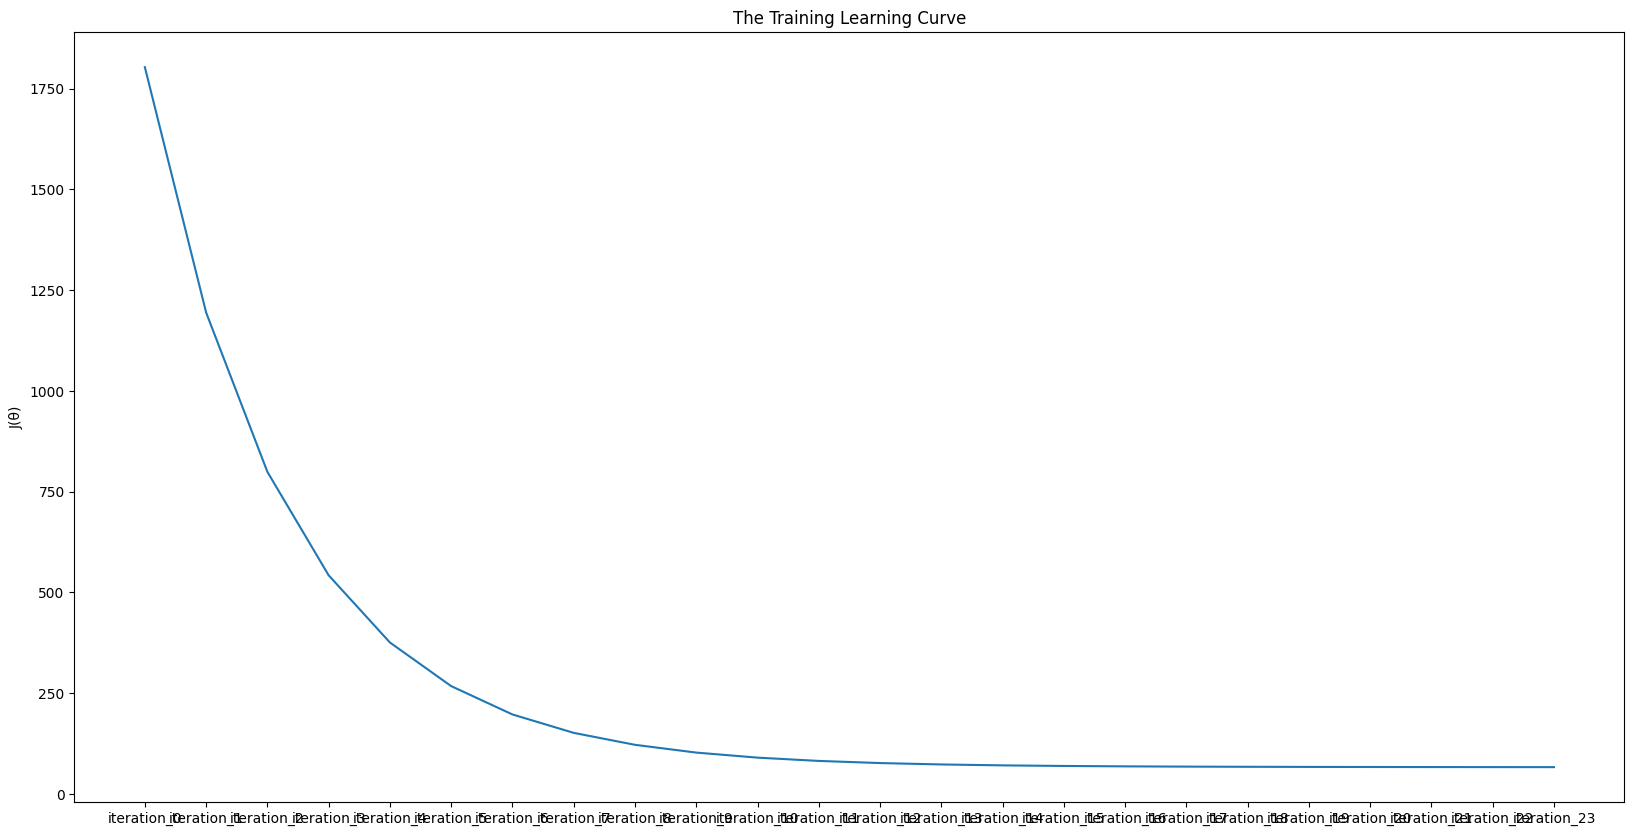

In [71]:
# Plot Training Learning Curve
Y1=[x for x in cost_dict.values()]
X1=[x for x in cost_dict.keys()]
fig = plt.figure(figsize=[20, 10])
plt.xlabel('Iterations')
plt.ylabel('J(θ)')
plt.title('The Training Learning Curve')
plt.plot(X1,Y1, color='tab:blue')

# Model Validation
Our learning curve for model training is looking good, and its shape is just as expected. But we still need to validate our model. To do that, we have already split our data into training and validation datasets before training starts since, for validation, we must use data that has never been used in the training process.

We will use the following thetas for our model validation. 
![hypothesis](res/7.png)

In [72]:
print("\n \033[1m θ\033[0m: {}\n".format(theta))

# calculate the cost value for the test set
cost_test = J(X_valid, y_valid, theta)
print("Cost of test data: {}".format(cost_test))


  θ: [2.03692557 1.13926025 1.14289218 6.02902784 6.60181418 6.82324225
 1.20521232 1.25048269]

Cost of test data: 76.48149798139411
